# Lien vers le dataset kaggle : 
https://www.kaggle.com/datasets/bwandowando/strong-passwords-in-rockyou2024-txt/data

In [8]:
# Import necessary libraries
import collections
import matplotlib.pyplot as plt
import re
# Function to read large files efficiently
def read_large_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            yield line

# Function to analyze the text file
def analyze_text(file_path):
    # Initialize counters
    char_counter = collections.Counter()
    seq_counter = collections.Counter()
    length_counter = collections.Counter()
    position_counter = collections.Counter()
    year_counter = collections.Counter()

    # Process each line in the file
    for line in read_large_file(file_path):
        line = line.strip()
        # Count characters
        char_counter.update(line)
        # Count sequences of characters (words)
        seq_counter.update(re.findall(r'\w+', line))
        # Count lengths of words
        length_counter.update([len(word) for word in re.findall(r'\w+', line)])
        # Count positions of the letter 'm'
        position_counter.update([pos for pos, char in enumerate(line) if char == 'm'])
        # Count years between 1800 and 2050
        year_counter.update(re.findall(r'\b(18\d{2}|19\d{2}|20[0-4]\d|2050)\b', line))
    
    return char_counter, seq_counter, length_counter, position_counter, year_counter

# Function to plot top 20 items from a counter
def plot_top_20(counter, title, xlabel, ylabel):
    top_20 = counter.most_common(20)
    labels, values = zip(*top_20)

    plt.figure(figsize=(10, 6))
    plt.bar(labels, values)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
file_path = 'RockYou2024/0.txt/0.txt'
char_counter, seq_counter, length_counter, position_counter, year_counter = analyze_text(file_path)

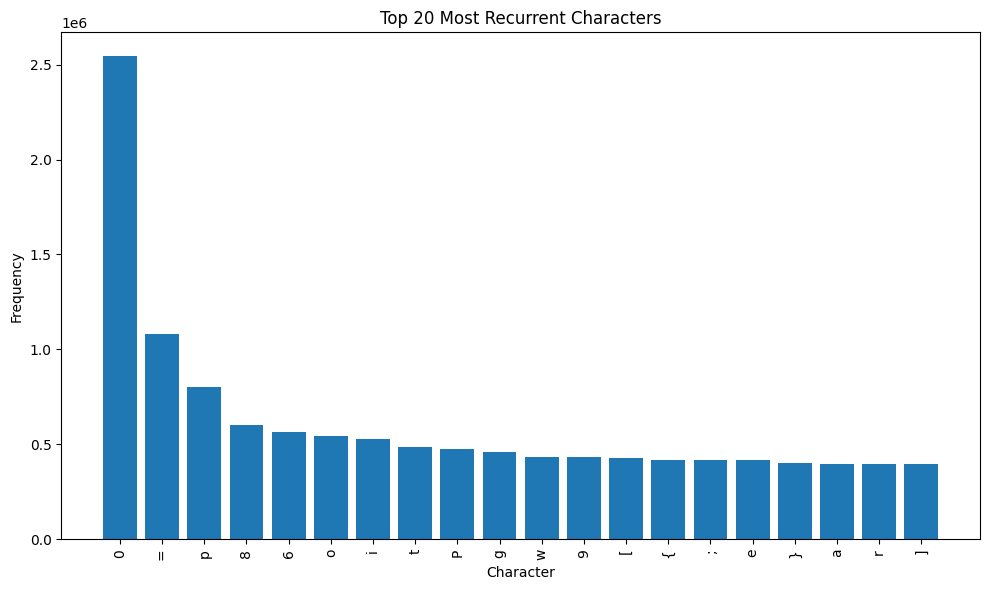

In [9]:
plot_top_20(char_counter, 'Top 20 Most Recurrent Characters', 'Character', 'Frequency')

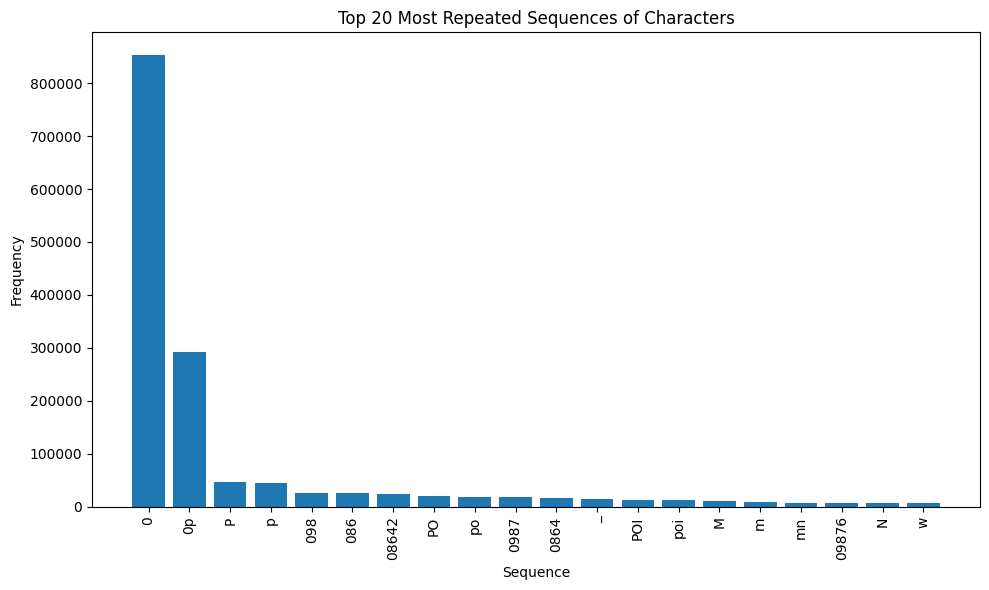

In [10]:
plot_top_20(seq_counter, 'Top 20 Most Repeated Sequences of Characters', 'Sequence', 'Frequency')

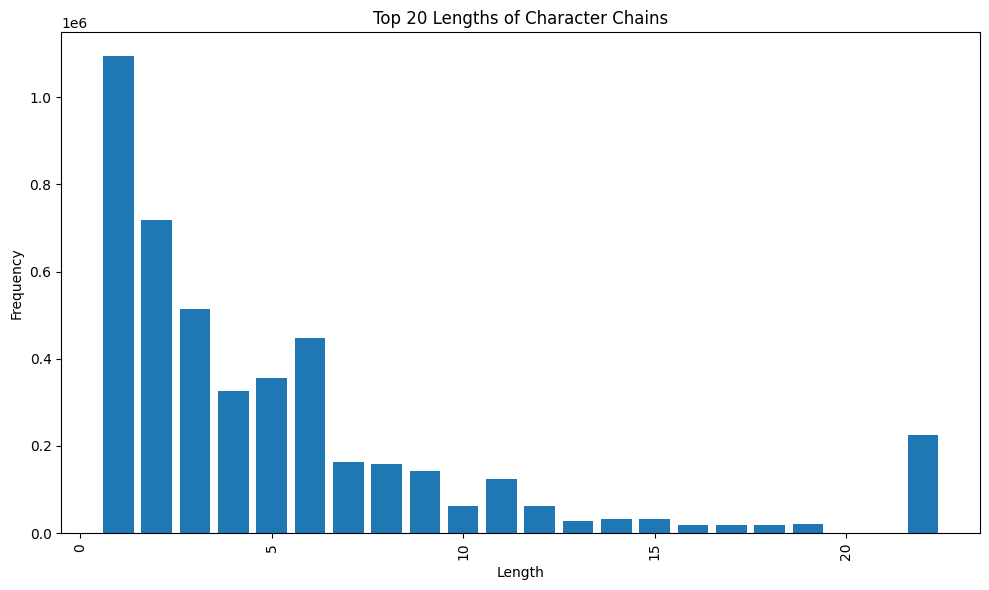

In [11]:
plot_top_20(length_counter, 'Top 20 Lengths of Character Chains', 'Length', 'Frequency')

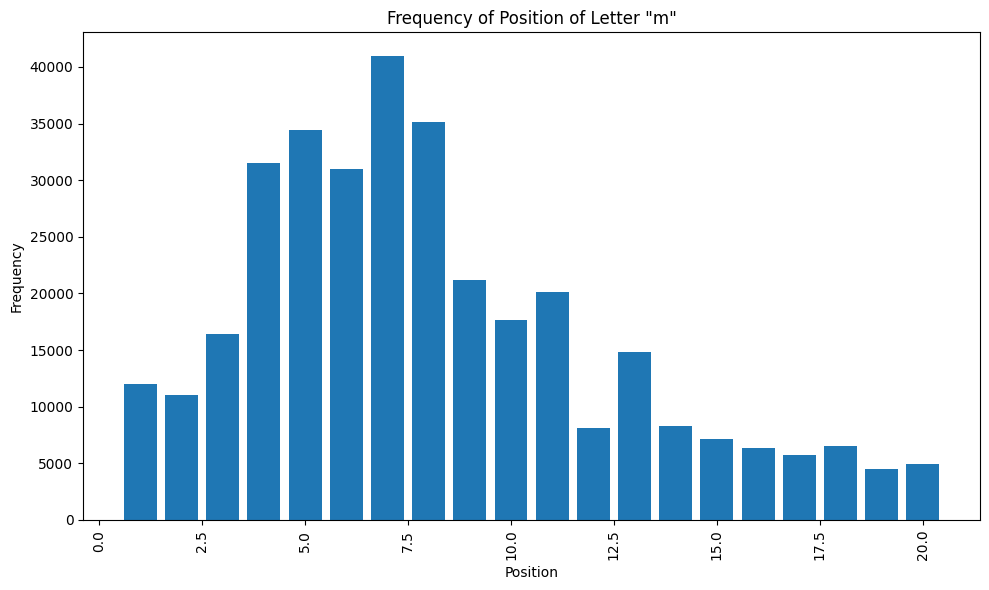

In [12]:
plot_top_20(position_counter, 'Frequency of Position of Letter "m"', 'Position', 'Frequency')

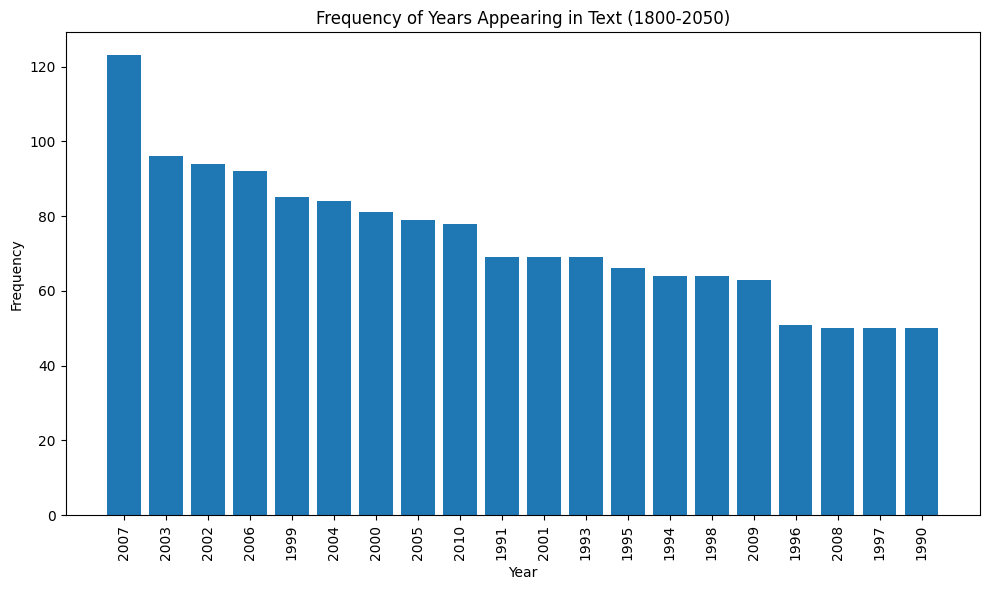

In [13]:
plot_top_20(year_counter, 'Frequency of Years Appearing in Text (1800-2050)', 'Year', 'Frequency')